In [6]:
import graspy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def gen_data(n, eps):
    pi = [0.4, 0.6]
    sizes = [int(pi[0]*n), int(pi[1]*n)]
    
    probsA = np.array([
        [0.5, 0.2],
        [0.2, 0.5]])
    
    probsB = np.array([
        [0.5 + eps, 0.2],
        [0.2, 0.5 + eps]])
    A1 = sbm(n=sizes, p=probsA)
    A2 = sbm(n=sizes, p=probsB)
    return A1, A2

def estimated_power(n, eps, iters):
    A1, A2 = gen_data(n, eps)
    npt = graspy.inference.NonparametricTest()
    npt.fit(A1, A2)
    sorted_ = np.sort(npt.null_distribution_)
    rej_ind = int(np.ceil(((1 - 0.05)*200))) #200 is n_bootstraps, 0.05 is alpha
    critical_value = sorted_[rej_ind]
    
    rejections = 0
    for i in range(iters):
        A, B = gen_data(n, eps)
        npt_2 = graspy.inference.NonparametricTest(n_bootstraps=1)
        npt_2.fit(A,B)
        U = npt_2.sample_T_statistic_
        if U > critical_value:
            rejections += 1
    return rejections/iters

def monte_carlo(ns, eps, iters = 1000):
    powers = np.zeros(shape = (len(ns),len(eps)))
    for i in tqdm(range(len(ns))):
        for j in tqdm(range(len(eps))):
            powers[i,j] = np.array(estimated_power(ns[i], eps[j], iters))
    return powers

In [34]:
from graspy.simulations import sbm
A = sbm([50,50],np.array([[.9,.1],[.1,.9]]))
A2 = sbm([50,50],np.array([[.9,.1],[.1,.9]]))
B = sbm([50,50],np.array([[.9,.7],[.7,.9]]))

In [96]:
from tqdm import tqdm
def get_power(n=50, iters=100):
    ns = [n, n]
    p1 = np.array([[.9,.1],[.1,.9]])
    p2 = np.array([[.9,.1],[.1,.9]]) #or .4 on off-diagonals for power -> 1
    A1 = sbm(ns,p1)
    A2 = sbm(ns,p2)
    npt = graspy.inference.NonparametricTest()
    p = npt.fit(A1, A2)
    sorted_ = np.sort(npt.null_distribution_)
    rej_ind = int(np.ceil(((1 - 0.05)*200))) #200 is n_bootstraps, 0.05 is alpha
    critical_value = sorted_[rej_ind]
    rejections = 0
    for i in range(iters):
        A = sbm(ns,p1)
        B = sbm(ns,p2)
        npt_2 = graspy.inference.NonparametricTest(n_bootstraps=1)
        npt_2.fit(A,B)
        U = npt_2.sample_T_statistic_
        if U > critical_value:
            rejections += 1
    return rejections/iters
# plt.hist(nonpar.null_distribution_, 50)
# plt.axvline(nonpar.sample_T_statistic_)
# plt.show()
# print(p)

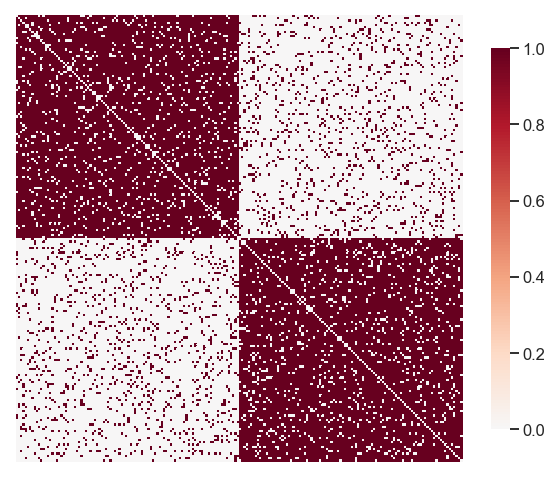

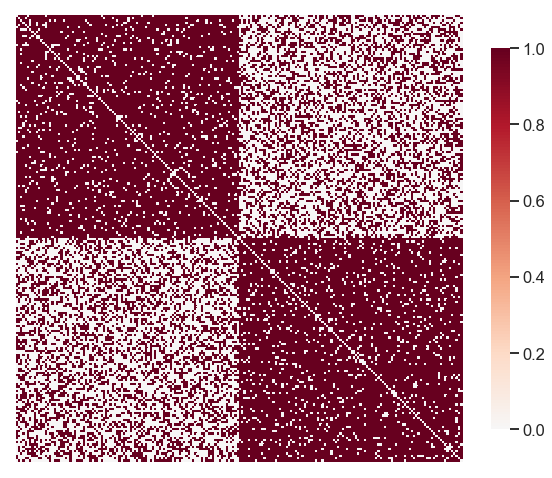

In [89]:
ns = [n, n]
p1 = np.array([[.9,.1],[.1,.9]])
p2 = np.array([[.9,.4],[.4,.9]])
A1 = sbm(ns,p1)
A2 = sbm(ns,p2)
graspy.plot.heatmap(A1)
graspy.plot.heatmap(A2)

In [93]:
pows = []
x = range(10,101,5)
allx = []
for n in tqdm(x):
    xs = []
    for _ in range(10):
        xs.append(get_power(n))
    allx.append(xs)
    pows.append(np.mean(xs))

[[0.9 0.1]
 [0.1 0.9]]
[[0.9 0.4]
 [0.4 0.9]]


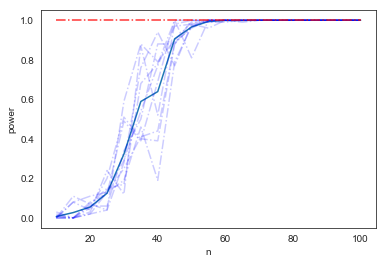

In [95]:
plt.plot(x,pows)
for i in range(10):
    plt.plot(x, np.array(allx)[:,i], 'b-.', alpha=0.2)
plt.plot(x,[1]*len(x),'r-.',alpha=0.8)
plt.xlabel('n')
plt.ylabel('power')
plt.savefig('power_curve.png')
plt.show()

In [97]:
pows = []
x = range(10,101,5)
allx = []
for n in tqdm(x):
    xs = []
    for _ in range(10):
        xs.append(get_power(n))
    allx.append(xs)
    pows.append(np.mean(xs))


100%|██████████| 19/19 [39:23<00:00, 236.19s/it]

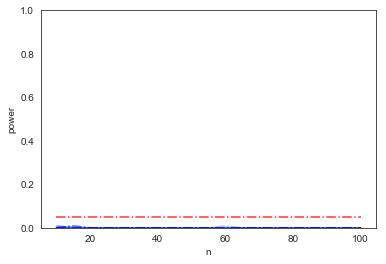

In [100]:
plt.plot(x,pows)
for i in range(10):
    plt.plot(x, np.array(allx)[:,i], 'b-.', alpha=0.2)
plt.plot(x,[0.05]*len(x),'r-.',alpha=0.8)
plt.xlabel('n')
plt.ylabel('power')
plt.ylim([0,1])
plt.savefig('power_curve_alpha.png')
plt.show()

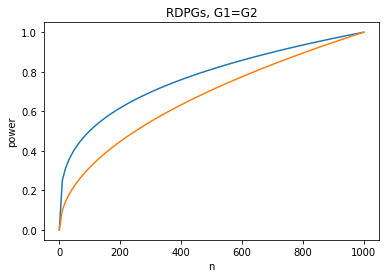

In [30]:
x = np.linspace(0,1000,100)
y = x**.3
y /= np.max(y)
y2 = x**.5
y2 /= np.max(y2)
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('n')
plt.ylabel('power')
plt.title('RDPGs, G1=G2')
plt.show()

(100,)


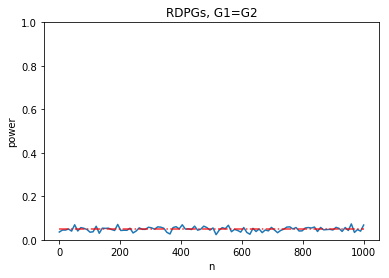

In [31]:
x = np.linspace(0,1000,100)
y = np.random.normal(0,0.01,100)
print(y.shape)
y += [0.05]*100
plt.plot(x,y)
plt.plot(x,[0.05]*100,'r-.',alpha=0.8)
plt.ylim([0,1])
plt.xlabel('n')
plt.ylabel('power')
plt.title('RDPGs, G1=G2')
plt.show()